### Project- Support Vector Machines...

In [12]:
import numpy as np

In [13]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [16]:
%matplotlib inline

In [17]:
iris = sns.load_dataset('iris')

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [20]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

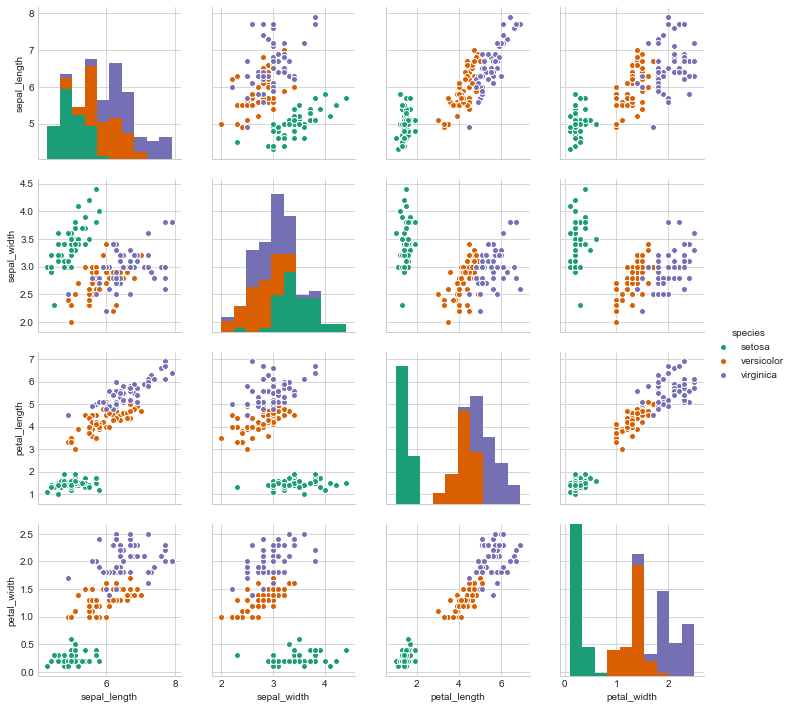

In [163]:
sns.pairplot(data=iris,hue='species',palette='Dark2')

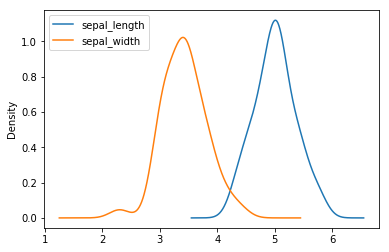

In [34]:
iris[iris['species']=='setosa'][['sepal_length','sepal_width']].plot(kind='kde')

In [35]:
x=iris[iris['species']=='setosa']['sepal_width']

In [36]:
y=iris[iris['species']=='setosa']['sepal_length']

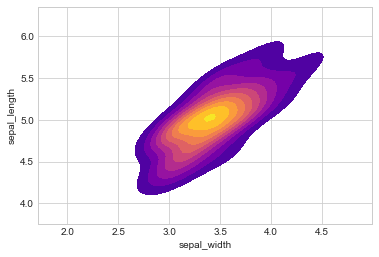

In [48]:
sns.set_style('whitegrid')
sns.kdeplot(x,y,shade=True,shade_lowest=False,cmap='plasma')

In [85]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [50]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [52]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
new_df=pd.get_dummies(iris['species'])

In [63]:
iris_df=pd.concat([iris,new_df],axis=1)

In [65]:
iris_df.drop(columns='species',axis=1,inplace=True)

In [66]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [67]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'setosa',
       'versicolor', 'virginica'],
      dtype='object')

In [69]:
iris_df.columns[0:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [71]:
iris_df.columns[4:8]

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [140]:
X=iris.drop('species',axis=1)

In [141]:
y=iris['species']

In [142]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [143]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [144]:
from sklearn.cross_validation import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [166]:
from sklearn.svm import SVC

In [167]:
model = SVC()

In [168]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [169]:
pred = model.predict(X_test)

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [172]:
print(confusion_matrix(y_test,pred))
print('\n')

print(classification_report(y_test,pred))

[[15  0  0]
 [ 0 17  0]
 [ 0  1 12]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.94      1.00      0.97        17
  virginica       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        45



In [152]:
from sklearn.grid_search import GridSearchCV

In [173]:
param_grid={'C':[0.1,1,10,100],'gamma':[1.0,0.1,0.01,0.001]}

In [174]:
model_grid = GridSearchCV(SVC(),param_grid,verbose=2)

In [175]:
model_grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1.0 ................................................
[CV] ....................................... C=0.1, gamma=1.0 -   0.0s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ....................................... C=0.1, gamma=1.0 -   0.0s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ....................................... C=0.1, gamma=1.0 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... C=10, gamma=0.001 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................................... C=10, gamma=0.001 -   0.0s
[CV] C=100, gamma=1.0 ................................................
[CV] ....................................... C=100, gamma=1.0 -   0.0s
[CV] C=100, gamma=1.0 ................................................
[CV] ....................................... C=100, gamma=1.0 -   0.0s
[CV] C=100, gamma=1.0 ................................................
[CV] ....................................... C=100, gamma=1.0 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................................... C=100, gamma=0.1 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................................... C=100, gamma=0.1 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1.0, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [176]:
pred_grid= model_grid.predict(X_test)

In [177]:
print(confusion_matrix(y_test,pred))
print('\n')

print(classification_report(y_test,pred))

[[15  0  0]
 [ 0 17  0]
 [ 0  1 12]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.94      1.00      0.97        17
  virginica       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        45



In [178]:
####... Support_Vector_Machines...